In [121]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
def var_exp(l):
    return - np.log(1 - rnd.random()) / l

def poisson_nh_slim(tt : float, lam : float, lam_f : dict):
    ''' lam debe ser el maximo valor que toma lam_f
    '''
    nt = 0
    eventos = []
    t = var_exp(lam)
    while t < tt:
        v = rnd.random()
        if v < lam_f(t) / lam:
            nt += 1
            eventos.append(t)
        t += var_exp(lam)
    return nt, eventos

def poisson_nh_slim_imp(tt, inters, lambs):
    eventos = [] 
    nt = 0
    j = 0
    t = var_exp(inters[j])
    while t < tt:
        if t <= inters[j]:
            ''' Calcular por adelgazamiento
            '''
            v = rnd.random()
            if v < (2 * t + 1) / lambs[j]:
                nt += 1
                eventos.append(t)
            t += var_exp(inters[j])
        else:
            ''' Avanzar el intervalo
            '''
            t = inters[j] + (t - inters[j]) * lambs[j] / lambs[j+1]
            j += 1
    return nt, eventos


In [123]:
def plot_slim(tt, fun, ml):
    t, evs = poisson_nh_slim(tt, ml, fun)

    for ev in evs:
        plt.plot([ev,ev],[1.5,0.5])

    plt.yticks(np.arange(0,3,1))
    plt.xticks(np.arange(0,tt+1,1))
    fig = plt.gcf()
    fig.set_size_inches(15,2)
    plt.show()

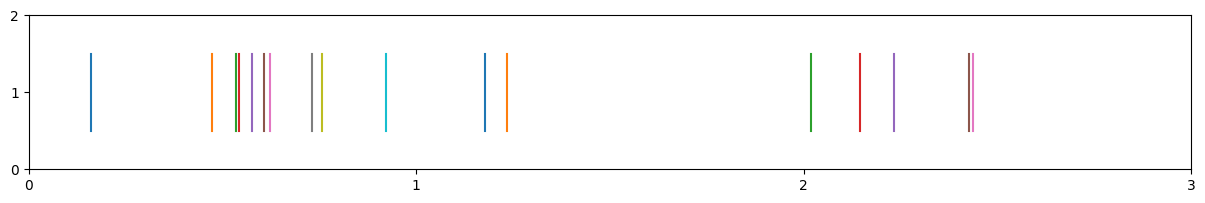

In [124]:
fun = lambda x: 3 + 4/(x+1)
rnd.seed(6767)
plot_slim(3, fun, 7)

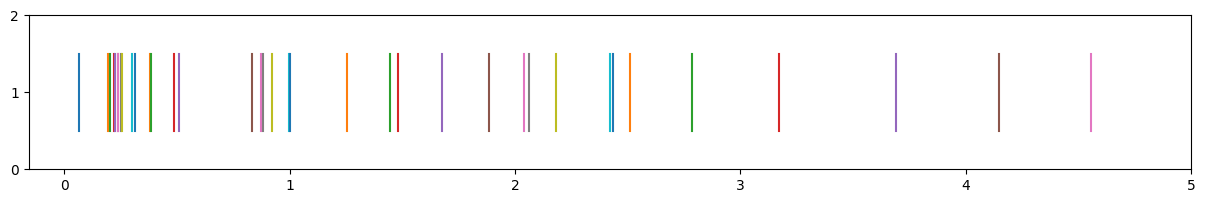

In [125]:
fun = lambda x: (x-2)**2 - 5*x + 17
rnd.seed(6767)
plot_slim(5, fun, 17)

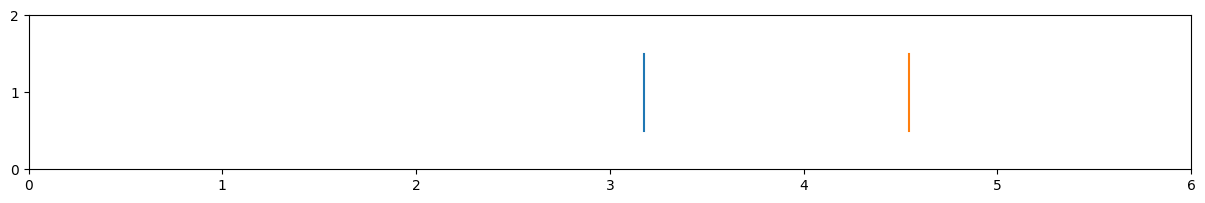

In [130]:
def fun(x):
    if 2 <= x <= 3:
        return x/2 - 1
    elif 3 <= x <= 6:
        return 1 - x/6
    else:
        return 0
    
rnd.seed(1)
plot_slim(6, fun, 0.5)

## Mejorada

In [127]:
def plot_imp(tt, inters, fun):
    t, evs = poisson_nh_slim_imp(tt, inters, fun)

    for ev in evs:
        plt.plot([ev,ev],[1.5,0.5])

    plt.yticks(np.arange(0,3,1))
    plt.xticks(np.arange(0,tt+1,1))
    fig = plt.gcf()
    fig.set_size_inches(15,2)
    plt.show()

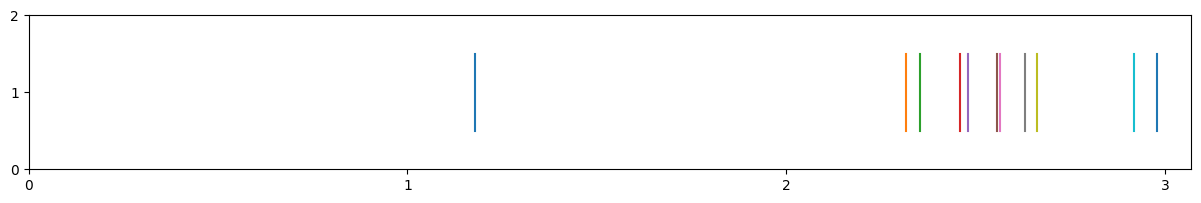

In [128]:
inters = [ 1, 2, 3 ]
fun = [ 7, 5, 4.33 ]
T = 3

rnd.seed(6767)
plot_imp(T, inters, fun)

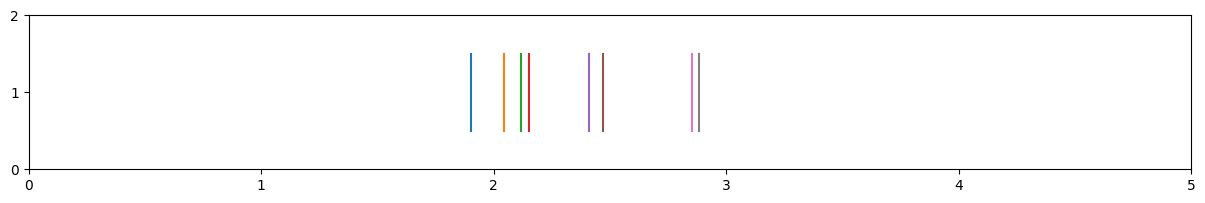

In [132]:
inters = [ 2, 3, 5 ]
fun = [ 17,  7, 1 ]
T = 5

rnd.seed(6767)
plot_imp(T, inters, fun)